FordGo Bike Data Visualization

By 

Olalekan Adekunle

Aim - In this analysis of the Ford GoBike System, I focused on the most typical user attributes and behaviors, specifically how user type, time, gender, and age affect system usage.

Dataset - FordGo Bike Data 2019
 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob

%matplotlib inline

In [3]:
bike_df = pd.read_csv('fordgo_bike_cleanedv2.csv')

In [4]:
bike_df.head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,year,month,day,hour,member_age
0,0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No,2019,February,Thursday,17,35
1,2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,2019,February,Thursday,12,47
2,3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No,2019,February,Thursday,17,30
3,4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,2019,February,Thursday,23,45
4,5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,No,2019,February,Thursday,23,60


Weekday Distribution of Ford GoBike Usage

Tuesdays and Thursdays appear to be the busiest days for using the bike-sharing service, although Wednesdays, Mondays, and Fridays are not far behind. The utilization is much lower on Saturdays and Sundays, indicating that the Ford bike share program is largely used for commuting during business hours.

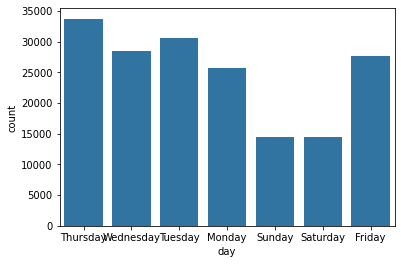

In [5]:
# Weekday usage of the Ford Go bike system
base_color = sb.color_palette()[0]
sb.countplot(data = bike_df, x = 'day', color=base_color);

Hourly Usage of Ford GoBikes

The bikes were used most frequently between the hours of 8 and 9 in the morning and 5 to 6 in the afternoon, which corresponds to an American workweek. This strengthens the argument that commuters are the main users of the bikes.

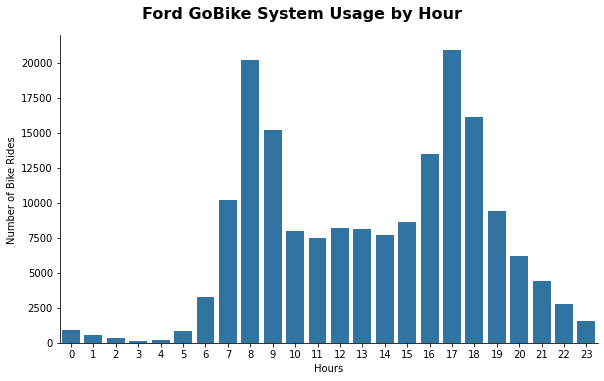

In [6]:
#Hourly usage of the Ford Go Bike System
graph = sb.catplot(data = bike_df, x='hour', kind='count', color = base_color, aspect = 1.7)

graph.set_axis_labels('Hours', 'Number of Bike Rides')

graph.fig.suptitle('Ford GoBike System Usage by Hour', y=1.05, fontsize=16, fontweight='bold');

Ford Go Bike System - Duration In Minutes

75% of trips take less than 13 minutes, with the average travel taking about 11 minutes. According to the histogram, the majority of rides last between three and eleven minutes. This shows that riders are traveling short distances on their bikes.

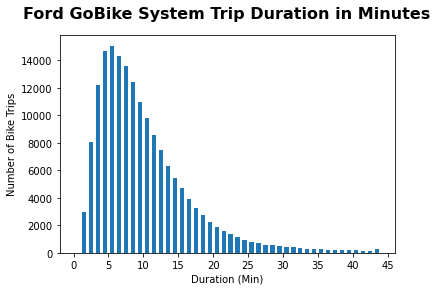

In [7]:
# Duration in seconds to duration in minutes
bike_df['duration_min'] = bike_df['duration_sec']/60
bike_df['duration_min'] = bike_df['duration_min'].astype(int)
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = bike_df, x = 'duration_min', bins = bin_edges, rwidth = 0.6);
#sb.distplot(bike_df['duration_min'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1});

plt.title("Ford GoBike System Trip Duration in Minutes", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Min)')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips');

Ford Go Bike System - Duration (Min) by User Type

The catplot and boxplot display the ride duration spread in minutes. In general, customer trips last longer (8 to 18 minutes, according to the box plot) than those of subscribers (5 to 12 minutes according to the box plot). This can likely be explained by the fact that subscribers are primarily commuters who make quick trips to work or school rather than more extensive journeys throughout the Bay Area.

<Figure size 841.68x595.44 with 0 Axes>

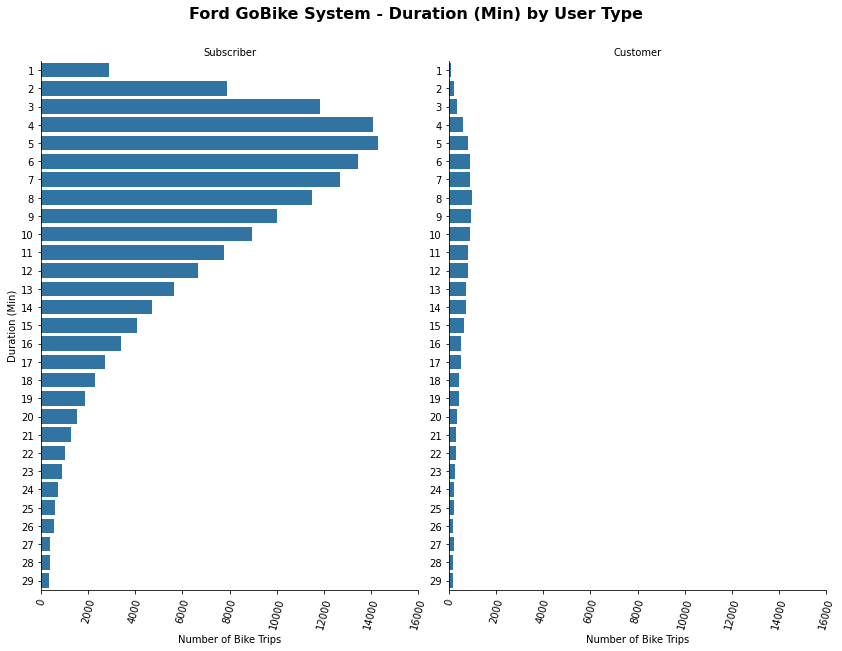

In [9]:
# Customer Usage by Duration vs. Subscriber Usage by Duration
plt.figure(figsize=[ 11.69, 8.27]);

data = bike_df.query('duration_min < 30')

graph = sb.catplot(data=data, y = 'duration_min', col='user_type', kind='count', sharey = False, color = base_color, height = 8.27,  aspect = (11.69/2)/8.27);

graph.set_axis_labels('Number of Bike Trips', 'Duration (Min)')
graph.set_titles('{col_name}')

graph.fig.suptitle('Ford GoBike System - Duration (Min) by User Type', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

Ford GoBike System - Customers vs. Subscribers Ages

The high percentage of users in their early 30s falling inside both categories can be seen in both user type graphs. Customers tend to have mostly younger users (the majority are under the age of 30), whereas the Subscriber user group is more evenly distributed throughout a variety of ages, with several users in their mid-fifties.

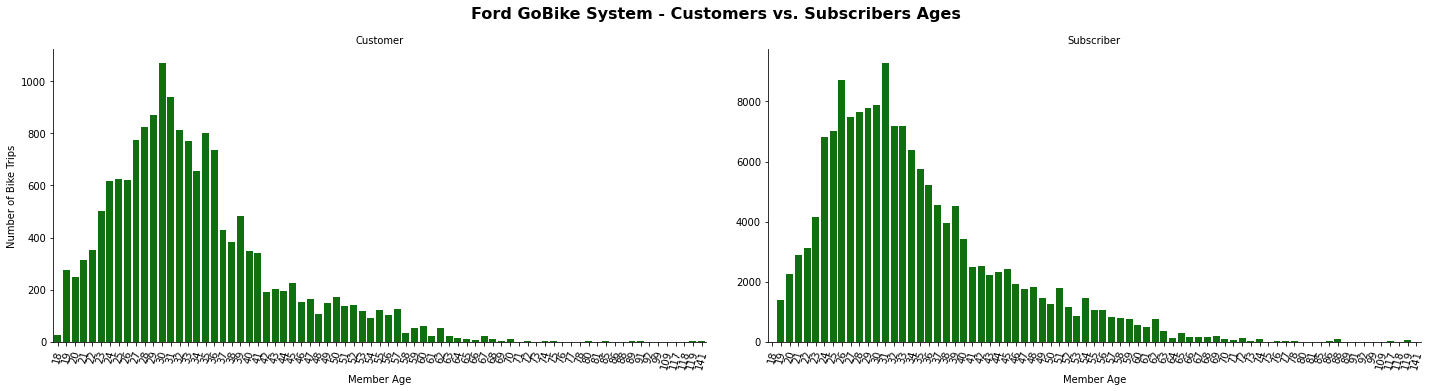

In [19]:
#Customer vs. Subscriber Usage by Age
graph = sb.catplot(data = bike_df, x = 'member_age', col='user_type', kind='count', sharey = False, color = 'green', height=5, aspect=2)

graph.set_axis_labels('Member Age', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers Ages', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

SUMMARY

A great (healthy and ecologically responsible) way to go around the city for both pleasure and work is by renting a bike from the Ford GoBike System. Users of the system fall into two categories: Subscribers and Customers. The majority of subscribers are daily commuting workers who rent bikes on weekdays between 8 and 9 am and 5 and 6 pm as well as occasionally during lunch. Customers utilize the system primarily on weekends to explore the Bay Area and are typically tourists or occasional riders.

